# Question 1 : Quel est le nombre de réactions et de métabolites communs dans les deux réseaux ?

Pour cette première analyse, j’ai vérifié quels métabolites et réactions étaient partagés entre les deux réseaux, celui de la tomate et celui de Ralstonia solanacearum. J’ai donc commencé par **extraire séparément les listes de métabolites avec l’outil Met4J: GetMetaboliteAttributes**, puis les **listes de réactions avec Met4J: GetEntities**. Une fois ces fichiers générés au format tabulaire (Edit puis DataType= tabular), je passe au nettoyage, j’ai d’abord supprimé les colonnes inutiles avec **l’outil Remove columns**, puis j’ai appliqué **Unique occurrences of each record** pour supprimer les doublons (il en avait pas) et n’obtenir qu’une liste propre, j’ai enfin utilisé l’outil **Join two Datasets** pour comparer les deux espèces, en effectuant la jointure sur l’ID et non sur le nom, puisque j’ai constaté que certains métabolites identiques portaient des noms différents selon le modèle. **Au final, j’obtiens 474 métabolites communs et 228 réactions communes.** Ces résultats me semblent cohérents biologiquement même si la tomate et Ralstonia sont très éloignées, elles partagent des voies métaboliques fondamentales (énergie, métabolisme central), ce qui explique qu’une fraction non négligeable du réseau soit conservée.

### **Les Métabolites Communs :**

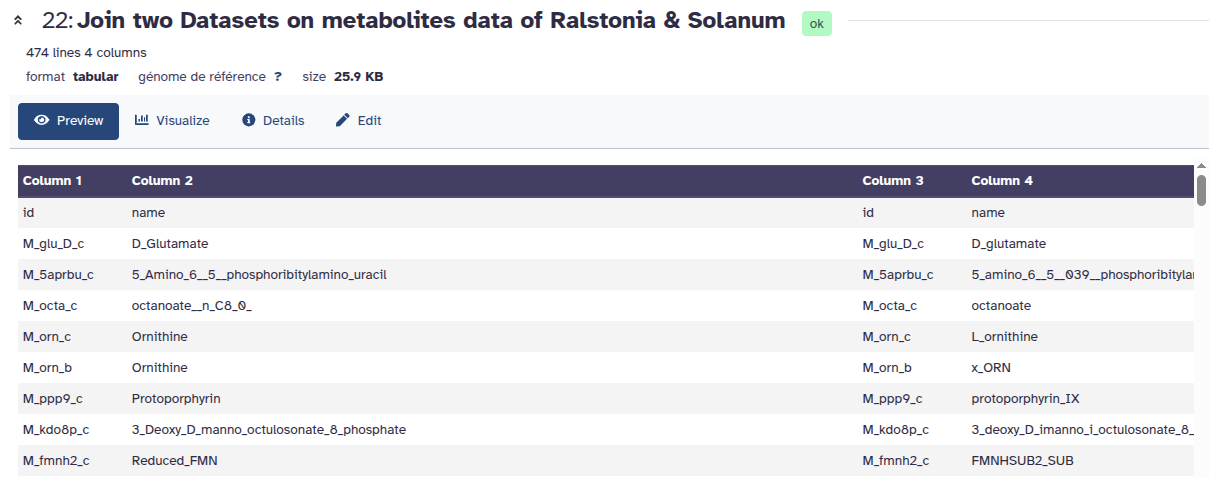

In [9]:
from IPython.display import Image, display

display(Image(filename="Metabolites_communs.png"))

### **Les Réactions Communes :**

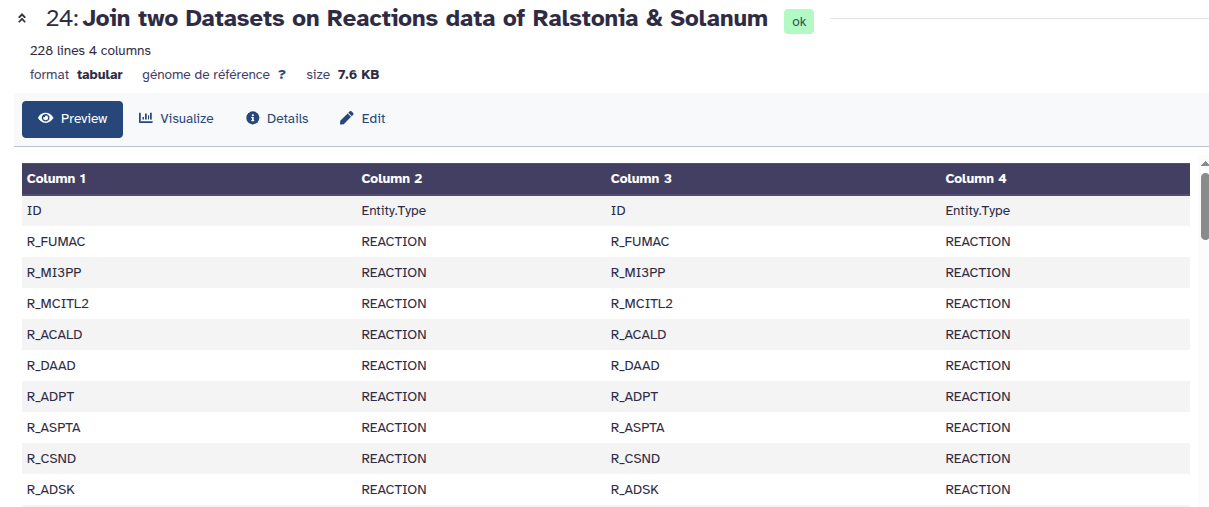

In [3]:
display(Image(filename="Reactions_communes.png"))

# Question 2 : Déterminer les métabolites qui sont des produits finaux (“targets”) de la tomate et qui sont des sources (seeds) pour R. solanacearum.

Pour répondre à la question, j’ai commencé par générer séparément les listes de seeds et de targets pour chaque réseau (tomate et Ralstonia solanacearum) avec **l’outil SeedsAndTargets**, en activant uniquement l’option correspondant au type demandé (export seeds ou export targets), tout en gardant **le filtre de compartiment cytoplasmique -c et l’algorithme de Borenstein -B**. Cette stratégie était finalement la plus fiable, car les paramètres combinés produisaient des sorties mélangées ou non annotées. Une fois les fichiers obtenus, je les ai standardisés dans Galaxy : conversion du format en **tabular (Edit puis DataType= tabular)**, suppression des doublons avec **Unique occurrences of each record** au cas où il en aurait (il en avait pas finalement).
Une fois les tables propres, j’ai effectué les deux intersections demandées à l’aide de l’outil **Join two datasets** :
1ere Jointure des Targets: produits finaux de la tomate avec les Seeds de Ralstonia puis 2eme Jointure des Seeds de tomate avec les Targets Ralstonia.
La première Jointure (Seeds Ralstonia et Targets Solanum) donne **cinq métabolites en commun: 2_3_Dihydroxybenzoate; Methanethiol, Glutaryl_CoA, hexanal, 1D_myo_Inositol_4_phosphate**, tandis que l’autre jointure (Seeds Solanum & Ralstonia targets) n’en fournit **qu’un seul: Deoxycytidine**. Ces résultats sont logiques biologiquement : Parmi les deux intersections obtenues, ce sont les cinq métabolites présents dans la liste des produits finaux de la tomate et des seeds de Ralstonia solanacearum qui sont les plus intéressants biologiquement. Cette configuration nous suggère une hypothèse selon laquelle la tomate produit naturellement ces molécules, tandis que la bactérie en dépend comme ressources d’entrée pour initier son réseau métabolique. Autrement dit, Ralstonia pourrait exploiter ces métabolites directement dans le tissu végétal infecté, ce qui en fait des candidats potentiels impliqués dans la relation trophique hôte–pathogène. Ce type d’association est donc cohérent dans notre étude avec le mode de vie parasitaire de Ralstonia solanacearum, qui détourne le métabolisme de la plante.

Pour vérifier l'hypothèse ci-dessus, un tour dans la littérature (internet) révèle que parmi les cinq métabolites qui sont des produits finaux dans la tomate et des seeds pour Ralstonia solanacearum, le M_mi4p_D_c correspondant à 1D-myo-inositol 4-phosphate (et ses dérivés) est déjà décrit comme un nutriment clé pour R. solanacearum pendant l’infection, c'est à dire que la bactérie dépend de sa dégradation pour exprimer pleinement sa virulence, et des mutants incapables d’utiliser le myo-inositol sont fortement atténués sur la tomate (hôte), Hamilton et al., 2021 in *Ralstonia solanacearum Depends on Catabolism of Myo-Inositol, Sucrose, and Trehalose for Virulence in an Infection Stage-Dependent Manner*. 
**Ce métabolite a donc bel et bien été identifié comme important dans la relation plante–pathogène.**

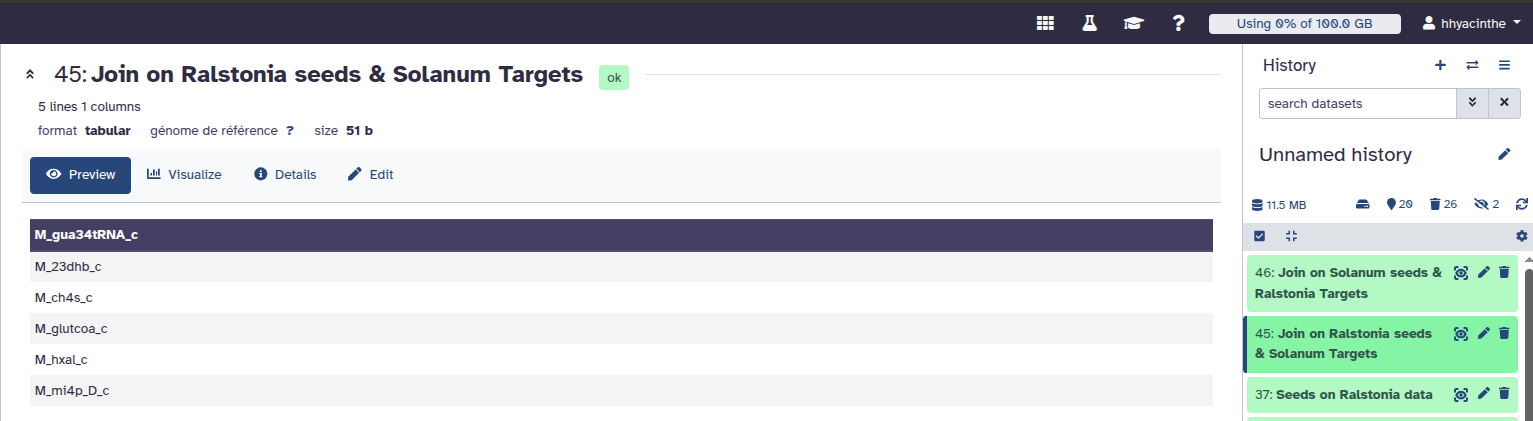

In [10]:
display(Image(filename="Ralstonia_seeds_Solanum_Targets.png"))

**Résultat de Seeds Solanum & Ralstonia targets (Jointure)**

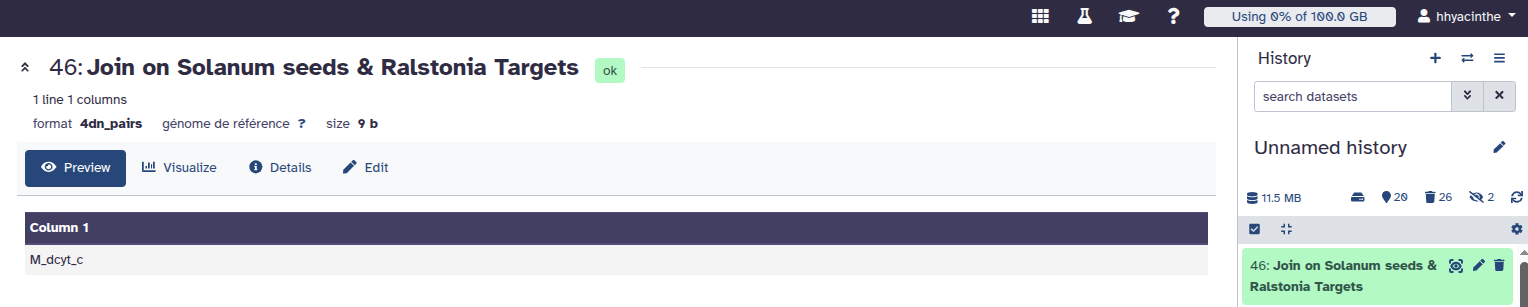

In [11]:
display(Image(filename="Solanum_seeds_Ralstonia_targets.png"))

# Question 3 : Quelles peuvent être les limites de l’algorithme de Borenstein ?

$ git remote -v
origin	https://github.com/HHyacinthe/Partie3.-Analyse_graphe_metabo.git (fetch)
origin	https://github.com/HHyacinthe/Partie3.-Analyse_graphe_metabo.git (push)
